In [80]:


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter, NullFormatter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [81]:

file = pd.read_csv("loan.csv", header = 0)

file.shape


(39717, 111)

In [82]:

fil.isnull().sum()


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [83]:

loan=file.dropna(axis=1,how='all')

In [84]:

loan.shape

(39717, 57)

In [85]:

loan.isnull().sum()


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [86]:
loan.drop(['title','emp_title','desc','mths_since_last_delinq','mths_since_last_record','last_pymnt_d','next_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'], axis=1, inplace=True)

loan.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
initial_list_status           0
out_prnc

In [87]:

loan.nunique().sort_values()


acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_

In [88]:
loan.drop(['acc_now_delinq','application_type','policy_code','initial_list_status','delinq_amnt','pymnt_plan'], axis=1, inplace=True)


In [90]:

loan.drop(["id", "member_id","url","funded_amnt",'out_prncp', 'out_prncp_inv','total_rec_int','total_rec_prncp','total_rec_late_fee','recoveries','collection_recovery_fee'],axis=1,inplace=True)


In [91]:

loan = loan[loan.loan_status != 'Current']

In [92]:

loan.isnull().sum()

loan.dropna(subset=['emp_length','revol_util','pub_rec_bankruptcies'],inplace=True)

loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36800 non-null  int64  
 1   funded_amnt_inv       36800 non-null  float64
 2   term                  36800 non-null  object 
 3   int_rate              36800 non-null  object 
 4   installment           36800 non-null  float64
 5   grade                 36800 non-null  object 
 6   sub_grade             36800 non-null  object 
 7   emp_length            36800 non-null  object 
 8   home_ownership        36800 non-null  object 
 9   annual_inc            36800 non-null  float64
 10  verification_status   36800 non-null  object 
 11  issue_d               36800 non-null  object 
 12  loan_status           36800 non-null  object 
 13  purpose               36800 non-null  object 
 14  zip_code              36800 non-null  object 
 15  addr_state         

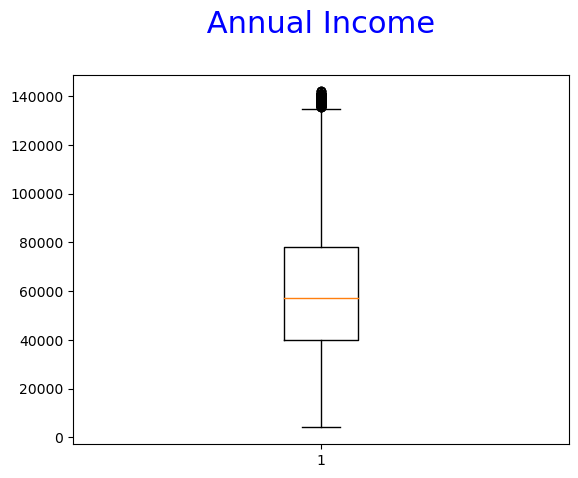

57000.0

In [93]:
                      #DATA FIXING 

limit_data = loan['annual_inc'].quantile(0.95)
valid = loan[loan['annual_inc'] < limit]
plt.title(" Annual Income \n", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.boxplot(valid.annual_inc)
plt.show()

valid['annual_inc'].median()

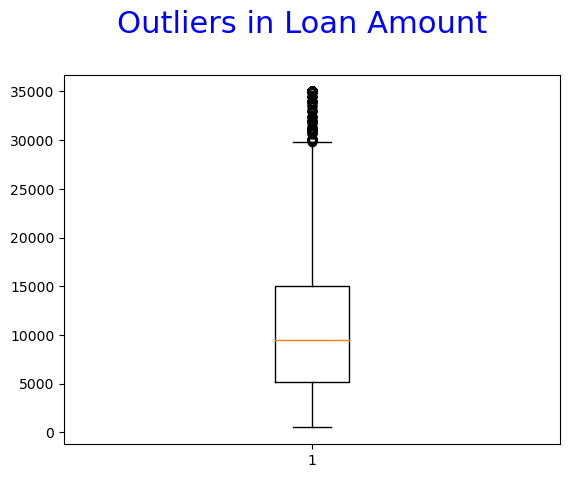

9500.0

In [95]:

plt.title("Outliers in Loan Amount  \n", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.boxplot(valid['loan_amnt'])
ax=plt.gca()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.show()
valid['loan_amnt'].median()

In [96]:

valid_charge=valid[valid['loan_status'] == 'Charged Off'].reset_index()


In [98]:

valid_charge['int_rate']=valid_charge['int_rate'].str.strip('%')
valid_charge['revol_util']=valid_charge['revol_util'].str.strip('%')
valid_charge.int_rate=pd.to_numeric(valid_charge.int_rate)


In [99]:

valid_charge['issue_d']=pd.to_datetime(valid_charge["issue_d"],format="%b-%y")
valid_charge['issue_d_yr']=pd.DatetimeIndex(valid_charge["issue_d"]).year
valid_charge['issue_d_mth']=pd.DatetimeIndex(valid_charge["issue_d"]).strftime('%b')

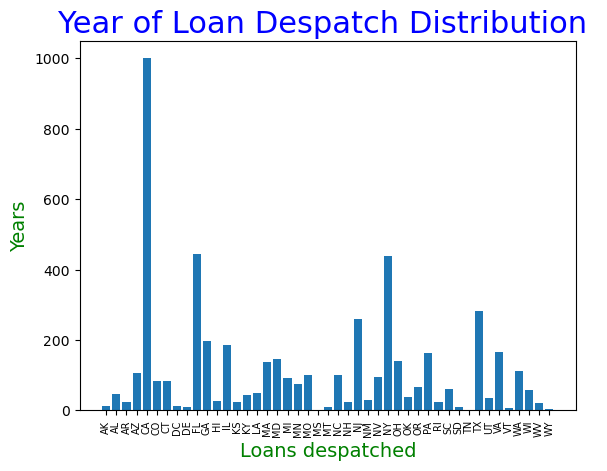

In [118]:
group_data=valid_charge.groupby('issue_d_yr').count()
x = []
y =  []
for i in range(5): 
  
    y.append(group_data.iloc[i,0])
    x.append(group_data.index[i])
plt.bar(x_vals,y_vals)
plt.title("Year of Loan Despatch Distribution ", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Loans despatched", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'},)
plt.ylabel("Years", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.xticks(rotation=90, fontsize=7)
plt.show()

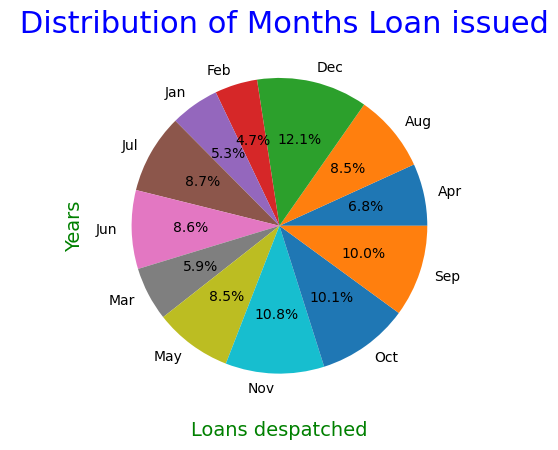

In [120]:
group=valid_charge.groupby('issue_d_mth').count()
x = []
y =  []
for i in range(12): 
  
    y.append(group.iloc[i,0])
    x.append(group.index[i])
plt.pie(y, labels=x, autopct='%1.1f%%')
plt.title(" Distribution of Months Loan issued", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Loans despatched", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("Years", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()


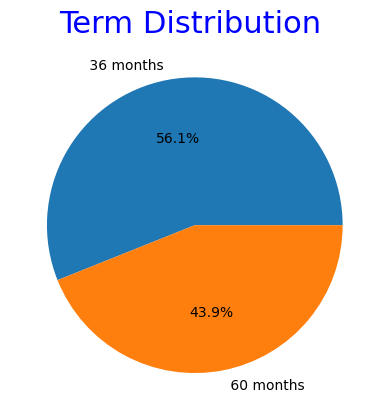

In [121]:
# we observed that Maximum defaults have happened in last quarter of 2011 when most loans were issued.

group=valid_charge.groupby("term").count()
x = []
y = []
for i in range(2): 
    x.append(group.index[i])
    y.append(group.iloc[i,0])

plt.pie(y, labels=x, autopct='%1.1f%%')

plt.title("Term Distribution ", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.show()


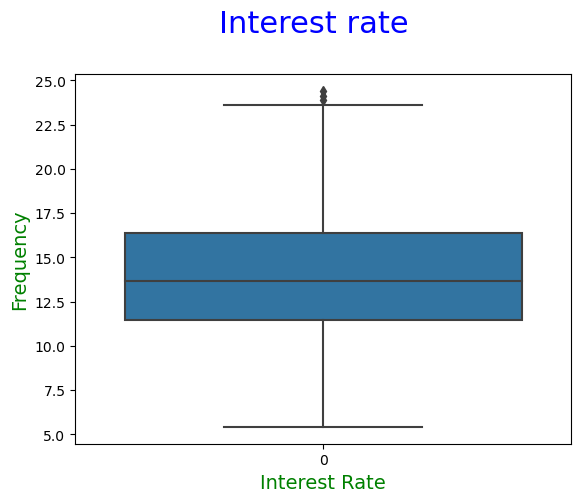

In [131]:
#we observed Most of loans have been for loans with term of 36 months

plt.title("Interest rate  \n", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})

plt.xlabel("Interest Rate", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("Frequency", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
sns.boxplot(data=valid_charge['int_rate'])
plt.show()


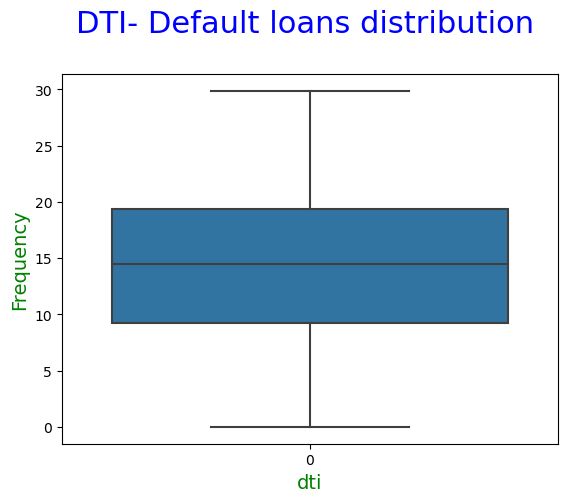

In [132]:
#Observation--> Most defaulters received interest at the rate of 11.5-17%  against median interest of all borrowers of 10% ,Some defaulters received loans at more than 22.5%

plt.title("DTI- Default loans distribution \n", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
sns.boxplot(data=valid_charge['dti'])
plt.xlabel("dti", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("Frequency", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()

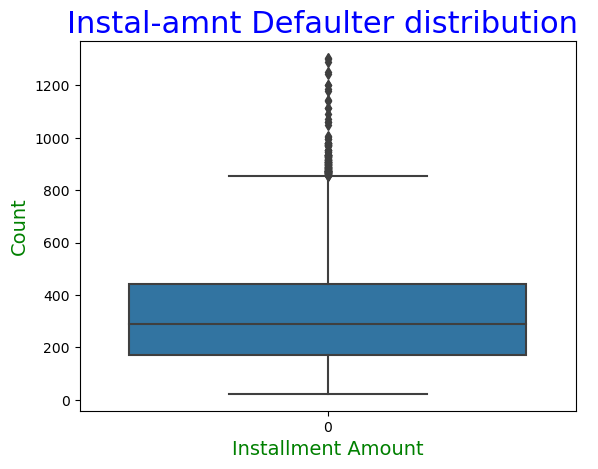

272.98

In [134]:
#Observation  that As per industry standard good DTI should be less than 36% ,since the dataset has max dti of 30% it is good.


sns.boxplot(data=valid_charge['installment'])
plt.title("Instal-amnt Defaulter distribution ", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})

plt.xlabel("Installment Amount", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("Count", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()
valid.installment.median()

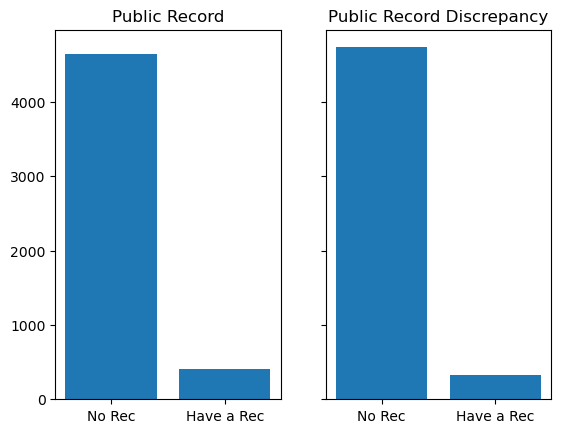

In [135]:
#Observation: Median installment amount is 273. The installment amount is not impacted by charged off or fully paid borrowers., Most of installment amount is around median,The defaulters had monthly installments between 145 and 410 approximately

group=valid_charge.groupby("pub_rec").count()
group_dis=valid_charge.groupby("pub_rec_bankruptcies").count()
fig, ax =plt.subplots(nrows=1,ncols=2,sharey=True)
x = ["No Rec","Have a Rec"]
y = []
z = []
for i in range(2): 
    y.append(group.iloc[i,0])
    z.append(group_dis.iloc[i,0])
ax[0].bar(x,y)
ax[1].bar(x,z)
ax[0].set_title('Public Record')
ax[1].set_title('Public Record Discrepancy')
plt.show()


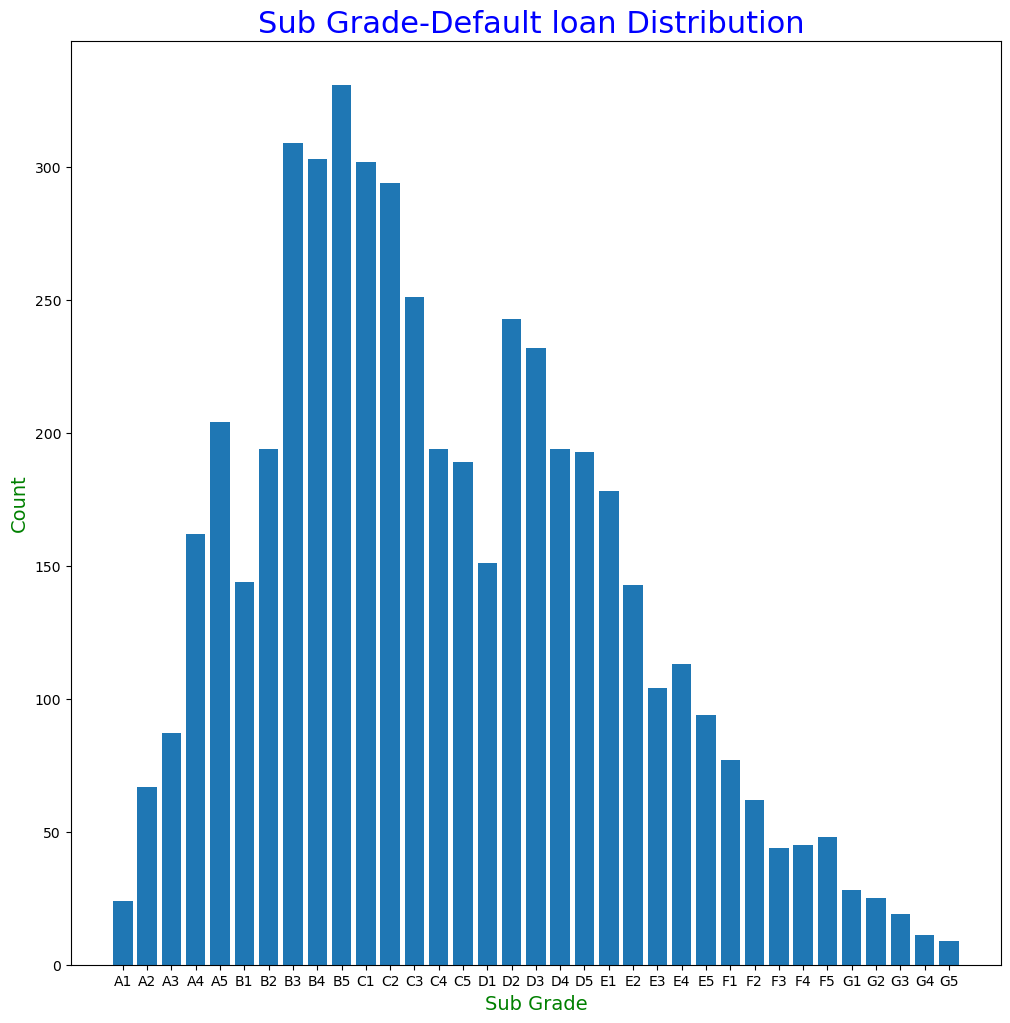

In [136]:
#Observation , 96% people have not went bankrupt or have a disciplinary record . 

plt.figure(figsize=(12,12))
group=valid_charge.groupby("sub_grade").count()
x = []
y = []
for i in range(35): 
   x.append(group.index[i])
   y.append(group.iloc[i,0])

plt.bar(x,y)
plt.title("Sub Grade-Default loan Distribution ", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Sub Grade", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("Count", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()


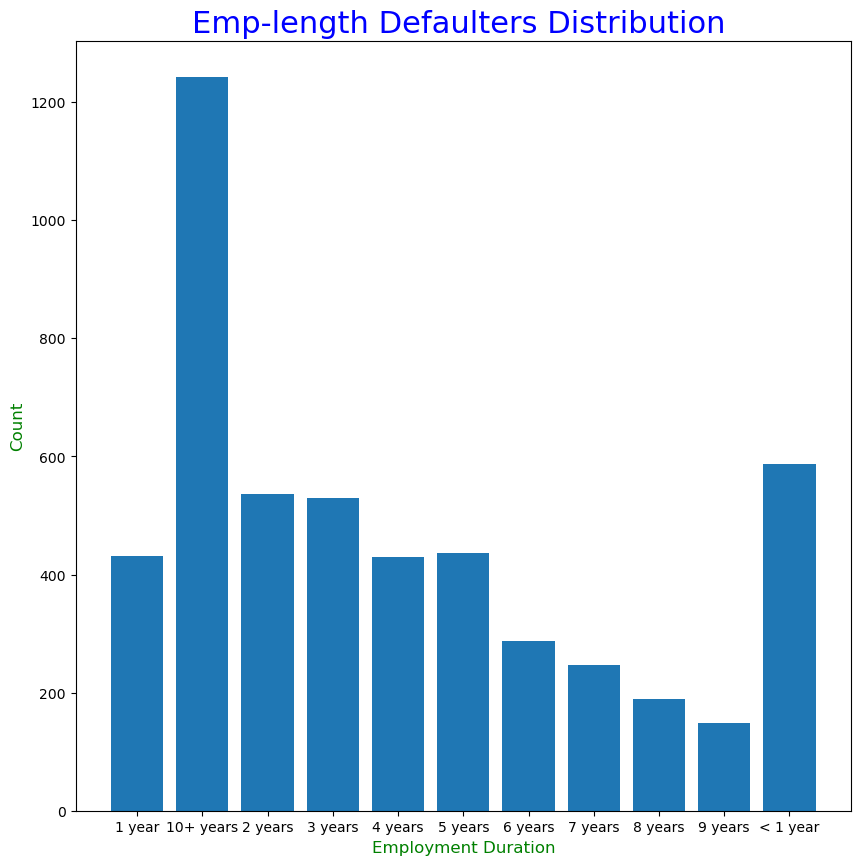

In [137]:
#Observation
#Most defaulters fall into grade B & C and Subgrade of C1 and B5. As most borrowers are from B grade.

group=valid_charge.groupby("emp_length").count()
plt.figure(figsize=(10,10))
x = []
y = []
for i in range(11): 
    x.append(group.index[i])
    y.append(group.iloc[i,0])

plt.bar(x,y)
# Labeling Axes
plt.title("Emp-length Defaulters Distribution ", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Employment Duration", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'green'})
plt.show()


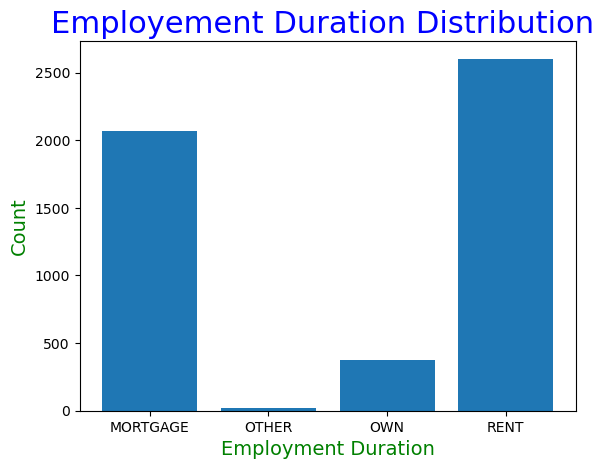

In [138]:
#Observation
#Defaulters are mostly 10+ years emploment length or are some people having less than 1 year or 2 years of employement

group=valid_charge.groupby("home_ownership").count()
x = []
y = []
for i in range(4): 
    x.append(group.index[i])
    y.append(group.iloc[i,0])
plt.bar(x,y)    
# Labeling Axes
plt.title("Employement Duration Distribution ", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Employment Duration", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("Count", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()

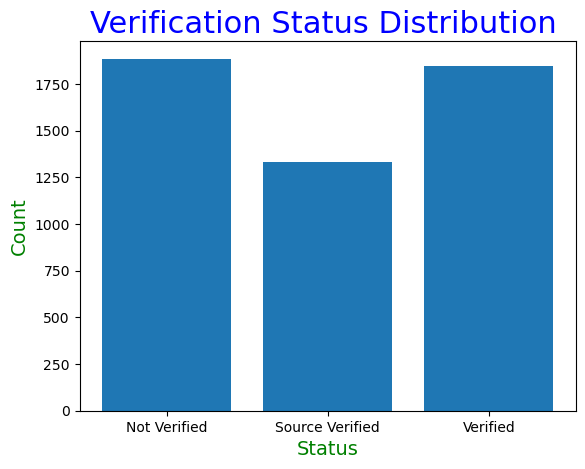

In [139]:
#Observation
#Most of the defaulters are on rent.

group=valid_charge.groupby("verification_status").count()
x = []
y = []
for i in range(3): 
    x.append(group.index[i])
    y.append(group.iloc[i,0])
plt.bar(x,y)    
# Labeling Axes
plt.title("Verification Status Distribution ", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Status", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("Count", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()

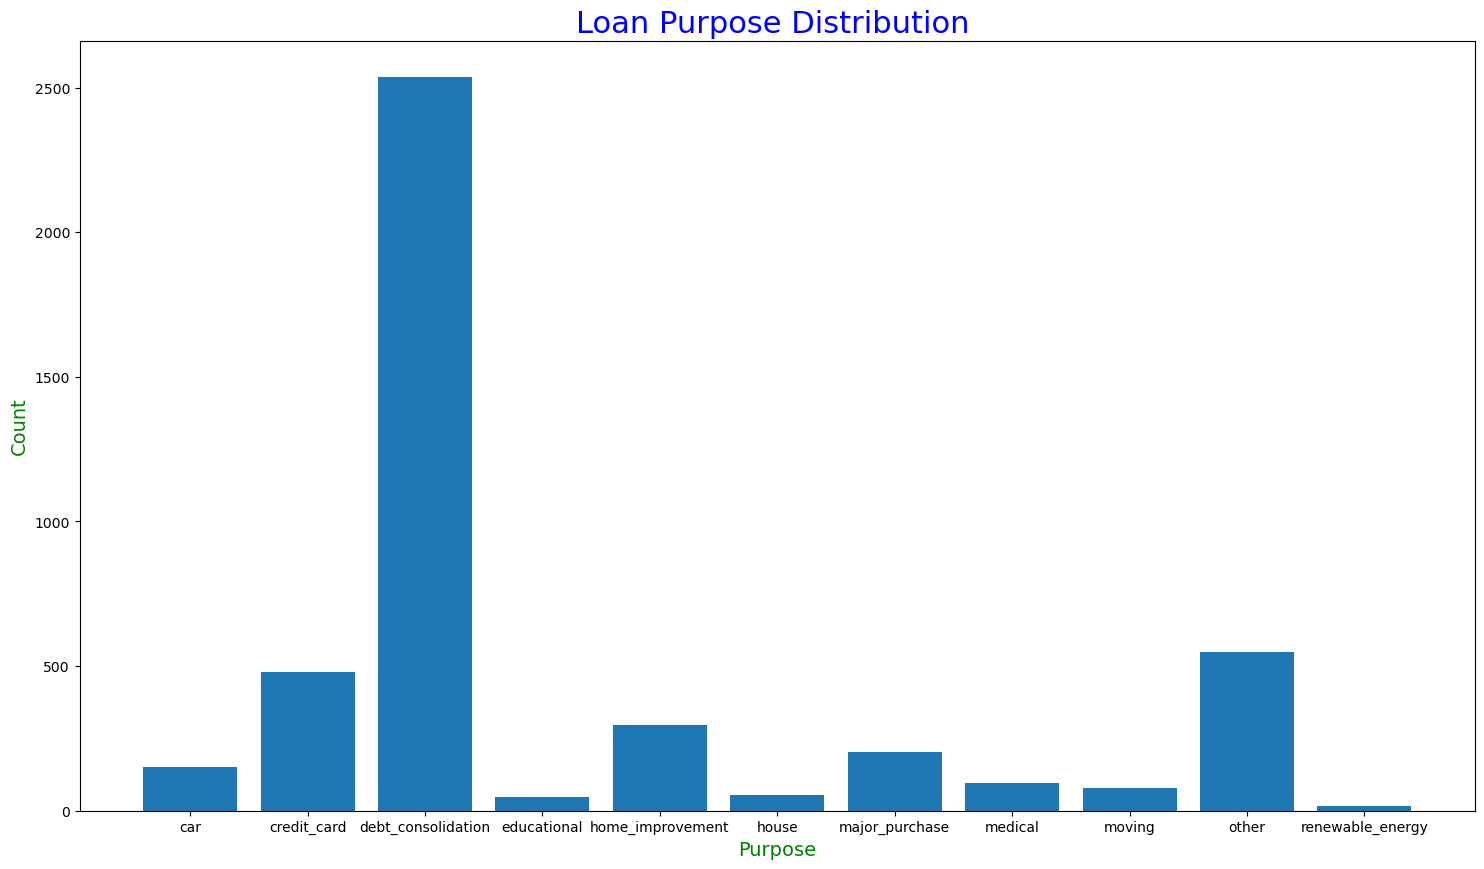

In [140]:
#Observation
#Most of the loans were assigned without annual income verification. 

group=valid_charge.groupby("purpose").count()
plt.figure(figsize=(18,10))
x = []
y = []
for i in range(11): 
    x.append(group.index[i])
    y.append(group.iloc[i,0])

plt.bar(x,y)
# Labeling Axes
plt.title("Loan Purpose Distribution ", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Purpose", fontdict={'fontsize':14, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("Count", fontdict={'fontsize': 14, 'fontweight' : 10, 'color' : 'green'})
plt.show()

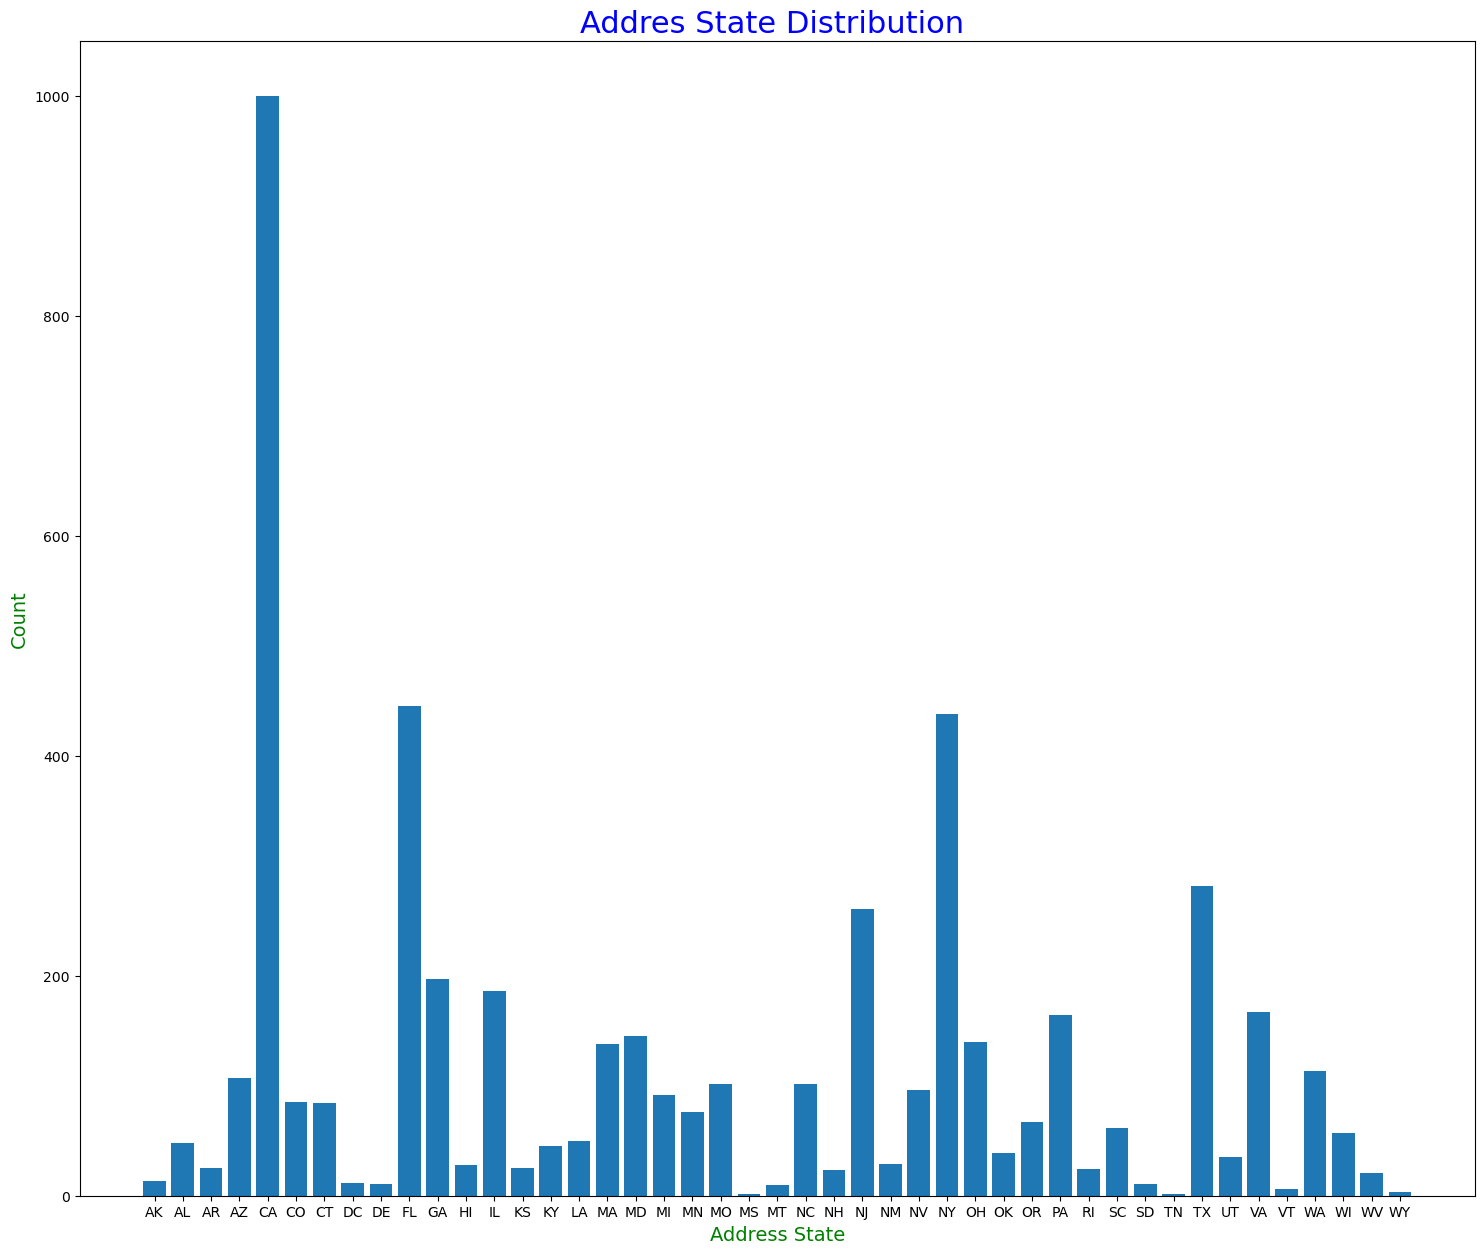

In [141]:
#Observation
#Most of the Defaults were on loans taken to pay off existing loans or to pay of credit card debt

group=valid_charge.groupby("addr_state").count()
plt.figure(figsize=(18,15))
x = []
y = []
for i in range(45): 
    x.append(group.index[i])
    y.append(group.iloc[i,0])

plt.bar(x,y)
# Labeling Axes
plt.title("Addres State Distribution ", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Address State", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("Count", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()
#Observation
#Many of the defaulters are from CA and NY


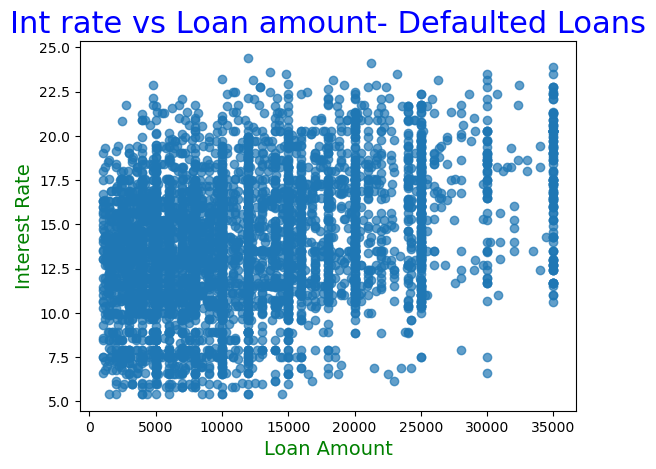

In [142]:
#BIVARIATE ANALYSIS


#Univariate analysis gave a picture of variables wrt Defaulted loans
#Bivariate analysis will particlarly call out scenarios which are indicator of Default.

#1. Annual income
#2. Interest rate
#3. Loan Amount


plt.scatter(valid_charge.loan_amnt, valid_charge.int_rate,alpha= 0.7)
# Adding and formatting title
plt.title("Int rate vs Loan amount- Defaulted Loans", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
# Labeling Axes
plt.xlabel("Loan Amount", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("Interest Rate", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()

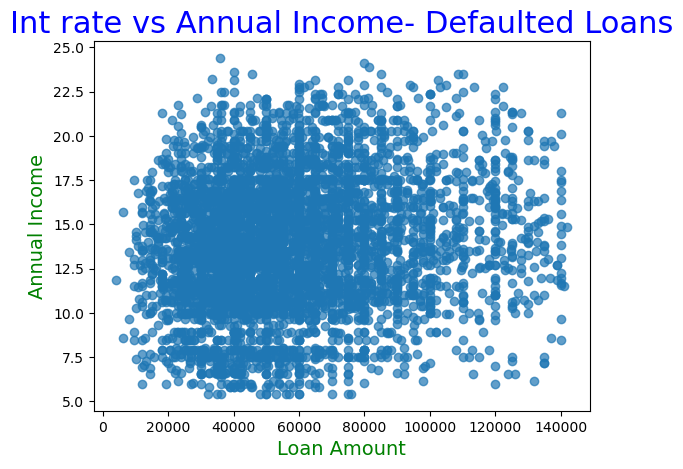

In [143]:

#Observation
#Defaulters  taken a loan in the range 5k - 10k and are charged interest rate of 10-15 %

plt.scatter(valid_charge.annual_inc, valid_charge.int_rate,alpha= 0.7)
# Adding and formatting title
plt.title("Int rate vs Annual Income- Defaulted Loans", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
# Labeling Axes
plt.xlabel("Loan Amount", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("Annual Income", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()

<Figure size 1000x1000 with 0 Axes>

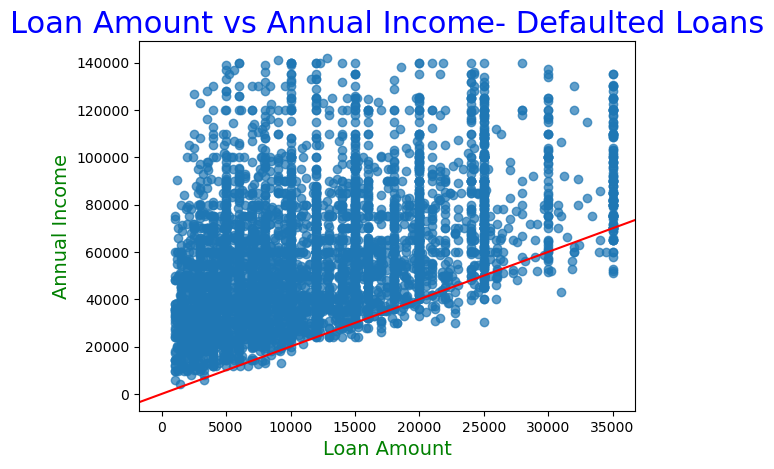

In [144]:
#Observation
#There is not specific pattern found in interest rate and Loan amount
#Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k


plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
plt.scatter(valid_charge.loan_amnt,valid_charge.annual_inc, alpha= 0.7)
ax.axline((0, 0), slope=2,color='r')
# Adding and formatting title
plt.title("Loan Amount vs Annual Income- Defaulted Loans", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
# Labeling Axes
plt.xlabel("Loan Amount", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("Annual Income", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()


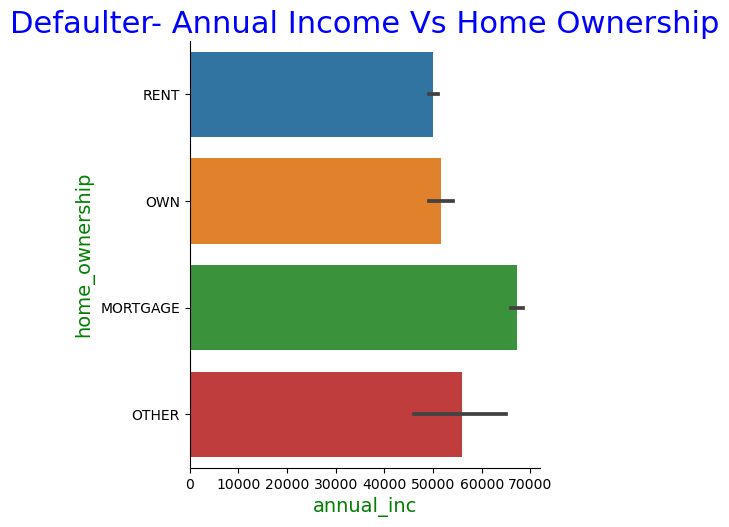

In [145]:

## Observation 
## There is linear relationship between annual income and loan amount 
## For loan amount between 0-15000 , more people took out loan. 
## Only high income people with salary higher than 23500 took more than 30000 loan amount.
## Once income crosses the median annual income of 57000 ,less likely people are to go for loans exceeding 25000
## People crossing 100000 rarely took loans of less than 5000
## People within income range 120000-140000 seldomly took loans crossing 25000"

sns.catplot(y = 'home_ownership', x = 'annual_inc', data = valid_charge, kind = 'bar')
# Labeling Axes
plt.title("Defaulter- Annual Income Vs Home Ownership", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.ylabel("home_ownership", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel("annual_inc", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()

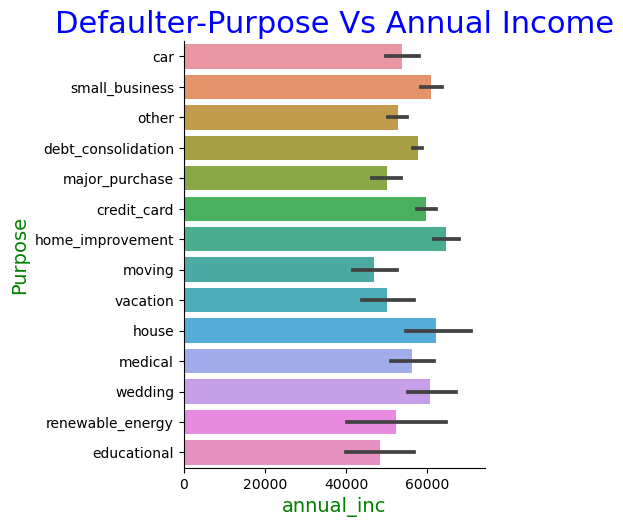

In [146]:
#Observations
#Most Defaulters whose home ownership is 'MORTGAGE and have income of 65-70k

sns.catplot(y = 'purpose', x = 'annual_inc', data = valid_charge, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Purpose Vs Annual Income", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.ylabel("Purpose", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel("annual_inc", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()


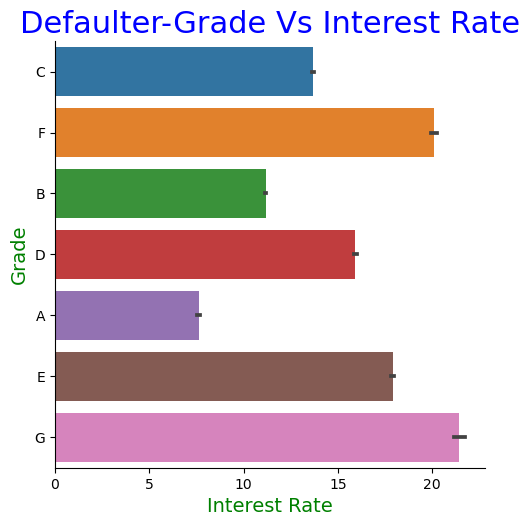

In [147]:
#Observation
#Most defaulters are taking loan for 'home improvement' and have income of 60k -70k

sns.catplot(y = 'grade', x = 'int_rate', data = valid_charge, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Grade Vs Interest Rate", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.ylabel("Grade", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel("Interest Rate", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()

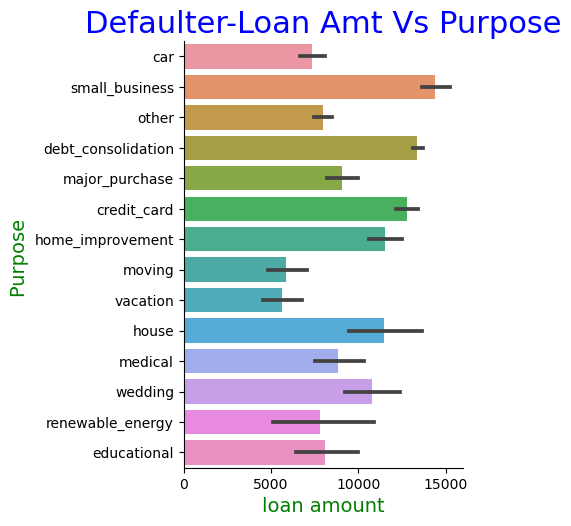

In [148]:
#Observation
#Most defaulters are grade G employees and have loans at interest rate above 20% 

sns.catplot(y = 'purpose', x = 'loan_amnt', data = valid_charge, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Loan Amt Vs Purpose", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.ylabel("Purpose ", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel("loan amount", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()

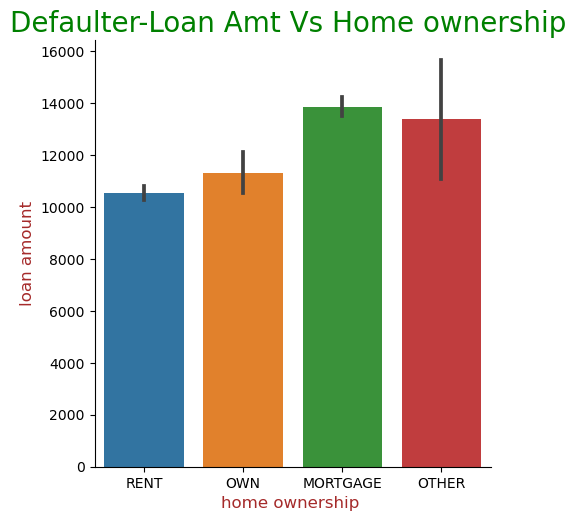

In [44]:
#Observations
##Most defaulters took loan had small business' and loan was upwards of 12500

sns.catplot(x = 'home_ownership', y = 'loan_amnt', data = valid_data_charged, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Loan Amt Vs Home ownership ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("home ownership ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("loan amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()


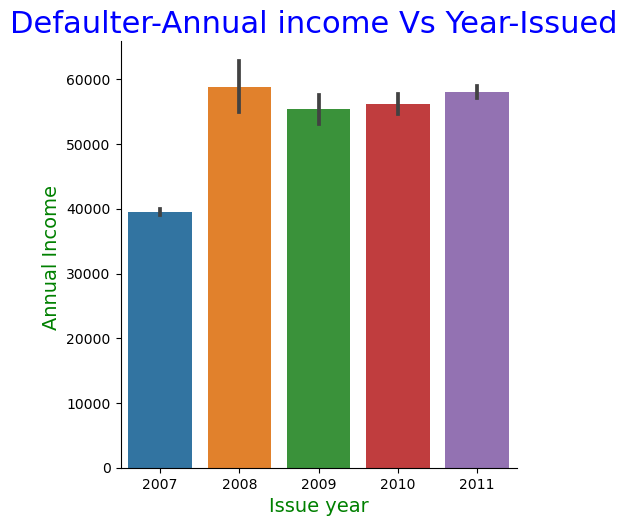

In [149]:
#Most of the defaulters whose home ownership is 'MORTGAGE and have Loan amount of 14000

sns.catplot(x = 'issue_d_yr', y = 'annual_inc', data = valid_charge, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Annual income Vs Year-Issued ", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.ylabel("Annual Income ", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel("Issue year", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()


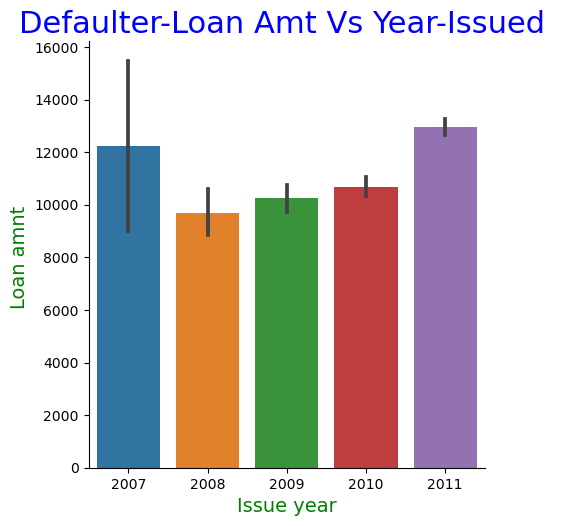

In [152]:
sns.catplot(x = 'issue_d_yr', y = 'loan_amnt', data = valid_charge, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Loan Amt Vs Year-Issued ", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.ylabel("Loan amnt ", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel("Issue year", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()

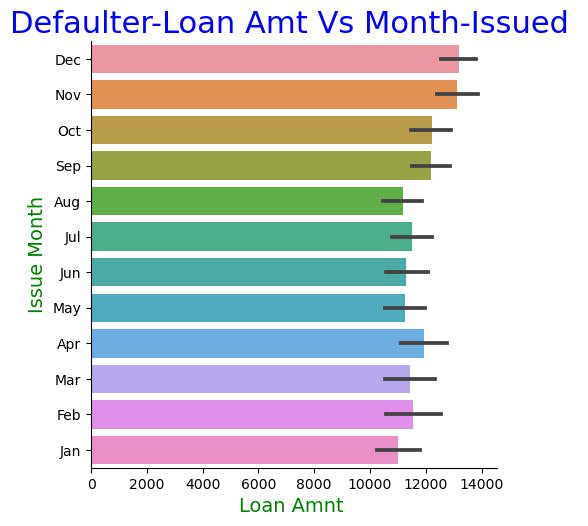

In [153]:
sns.catplot(y = 'issue_d_mth', x = 'loan_amnt', data = valid_charge, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Loan Amt Vs Month-Issued ", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Loan Amnt ", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("Issue Month", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()

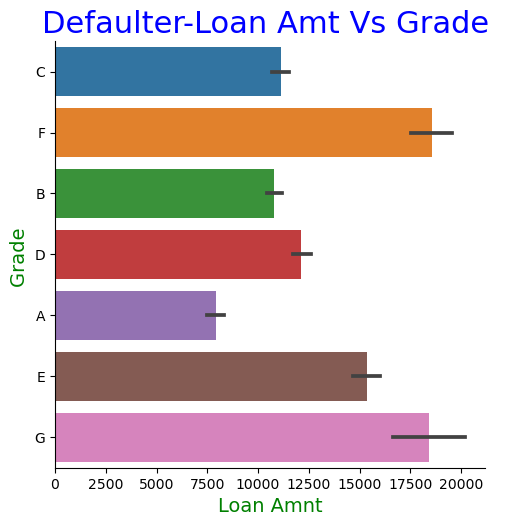

In [154]:
#Observations
#Most of the defaulted loans are in Month of Dec'2011.

sns.catplot(y = 'grade', x = 'loan_amnt', data = valid_charge, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Loan Amt Vs Grade ", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.ylabel("Grade ", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel("Loan Amnt", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()

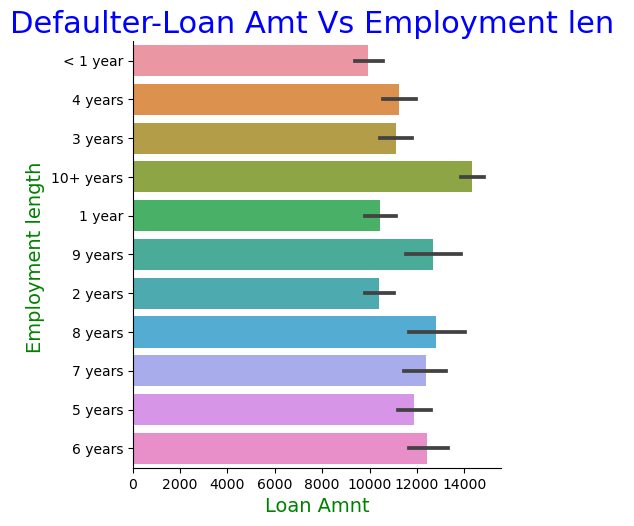

In [155]:
#Observation
#When grade is F and loan amount is between 17k-20k

sns.catplot(y = 'emp_length', x = 'loan_amnt', data = valid_charge, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Loan Amt Vs Employment len ", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.ylabel("Employment length ", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel("Loan Amnt", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()

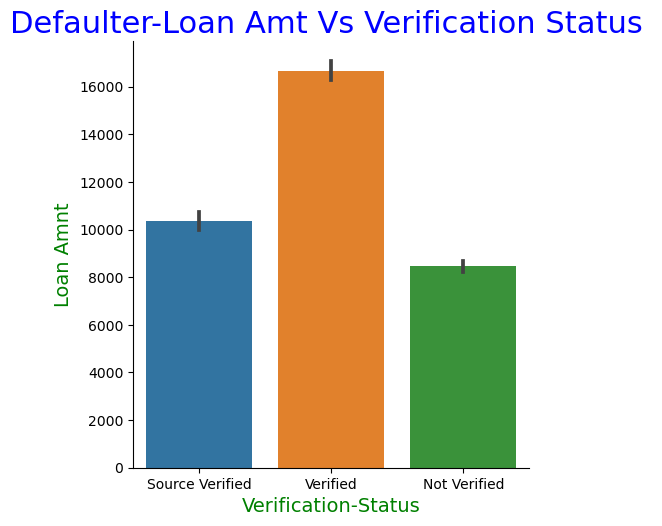

In [156]:
#Observation
#Mostof the defaults have happened when the employees have 10+yrs experience and loan amount is 14k+

sns.catplot(x = 'verification_status', y = 'loan_amnt', data = valid_charge, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Loan Amt Vs Verification Status ", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Verification-Status", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("Loan Amnt", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'green'})
plt.show()

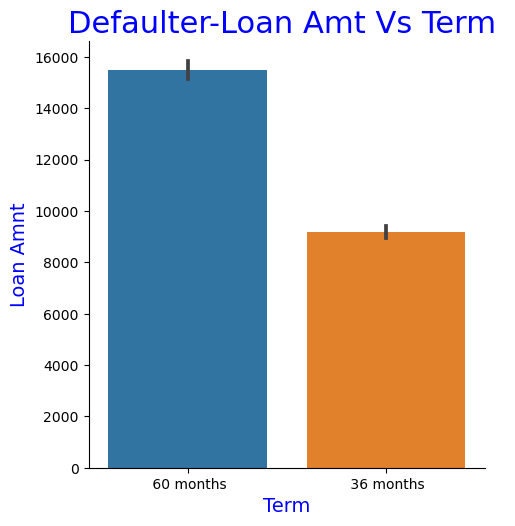

In [157]:
#Observation
#Most of the defaulters had been verified and loan amount is above 16k

sns.catplot(x = 'term', y = 'loan_amnt', data = valid_charge, kind = 'bar')
# Labeling Axes
plt.title("Defaulter-Loan Amt Vs Term ", fontdict={'fontsize': 22, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Term", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'blue'})
plt.ylabel("Loan Amnt", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

#Observation
#Higher amount loans have tenure of  60 months.